# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [21]:
# Load pickled data
import tensorflow as tf
import pickle
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data
training_file = os.path.join('..', 'data', 'train.p')
validation_file= os.path.join('..', 'data', 'valid.p')
testing_file = os.path.join('..', 'data', 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# import lables
labels = pd.read_csv('signnames.csv')


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [22]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
labels_name = labels['SignName'].values
labels_ID = labels['ClassId'].values
n_classes = len(labels_ID)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# count samples in each dataset
train_ID, train_ID_count = np.unique(y_train, return_counts=True)
test_ID, test_ID_count = np.unique(y_test, return_counts=True)
valid_ID, valid_ID_count = np.unique(y_valid, return_counts=True)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


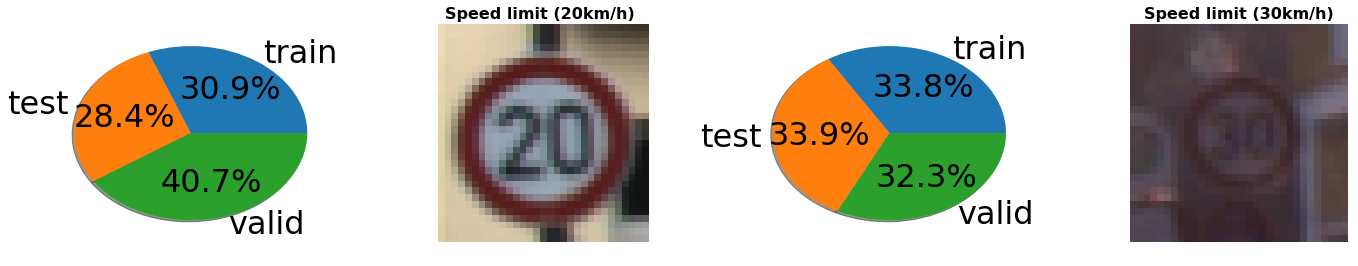

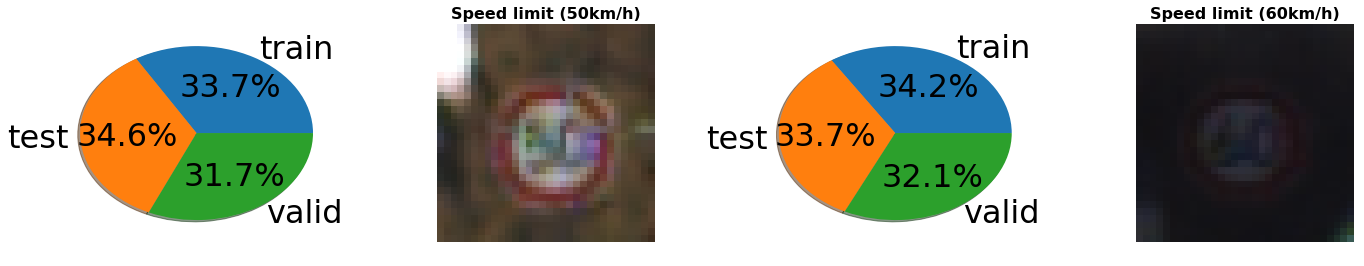

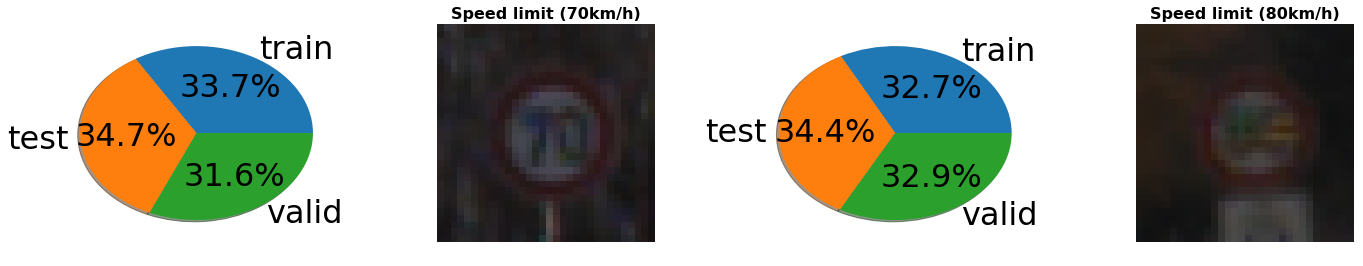

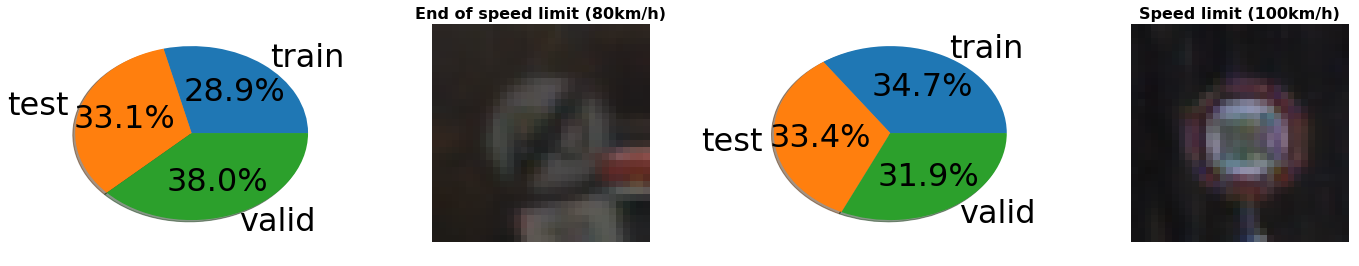

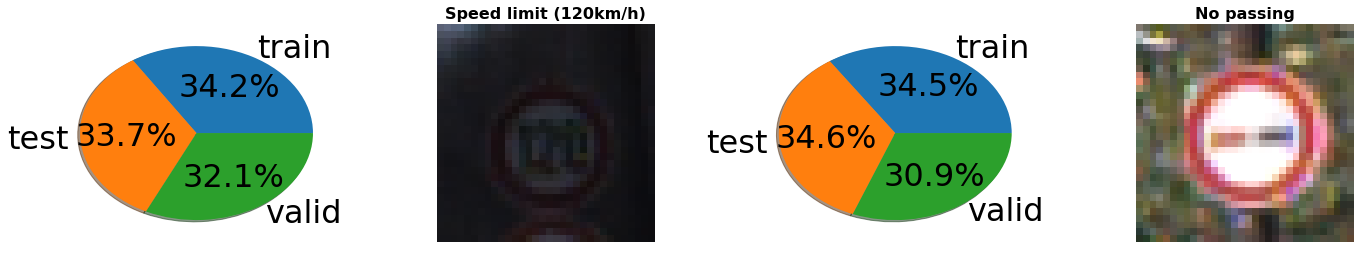

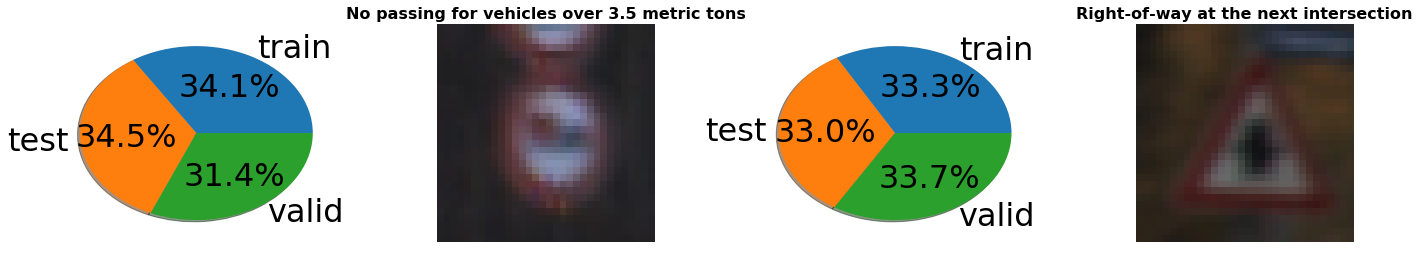

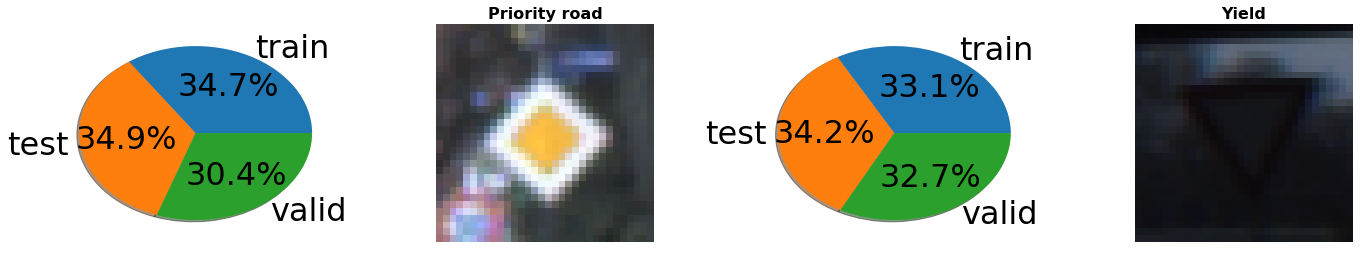

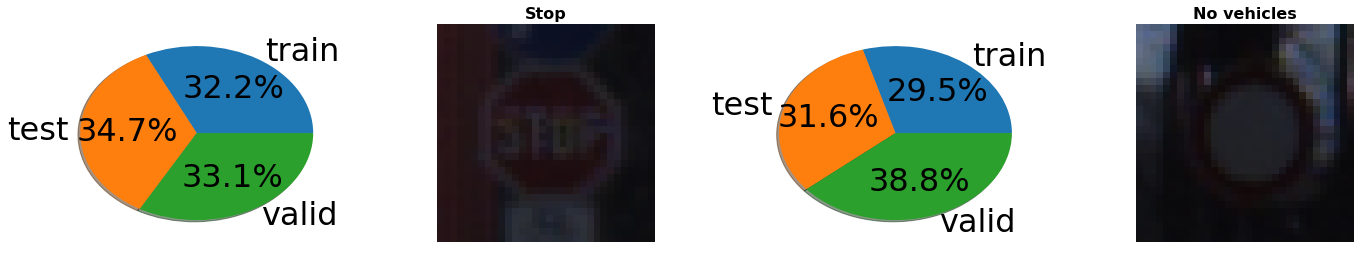

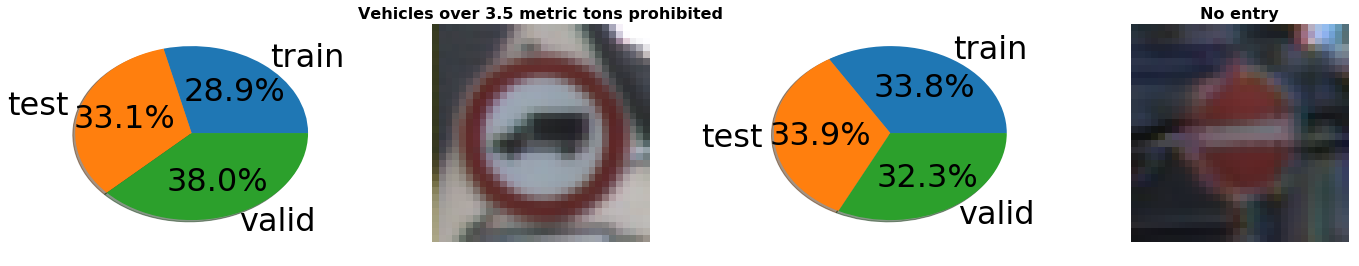

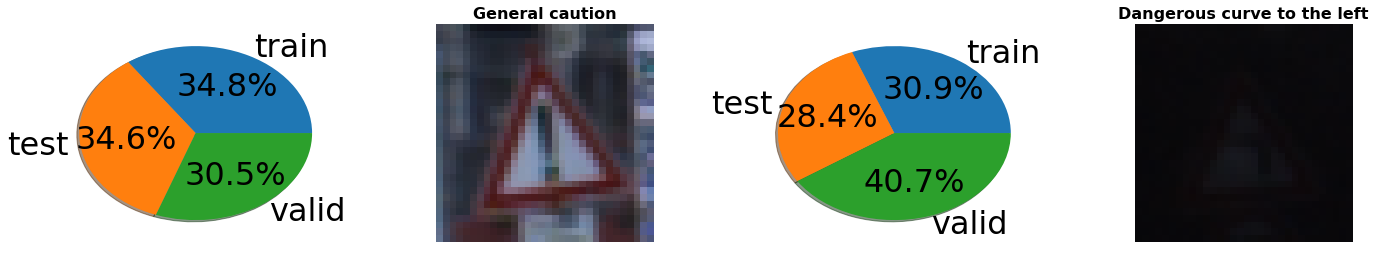

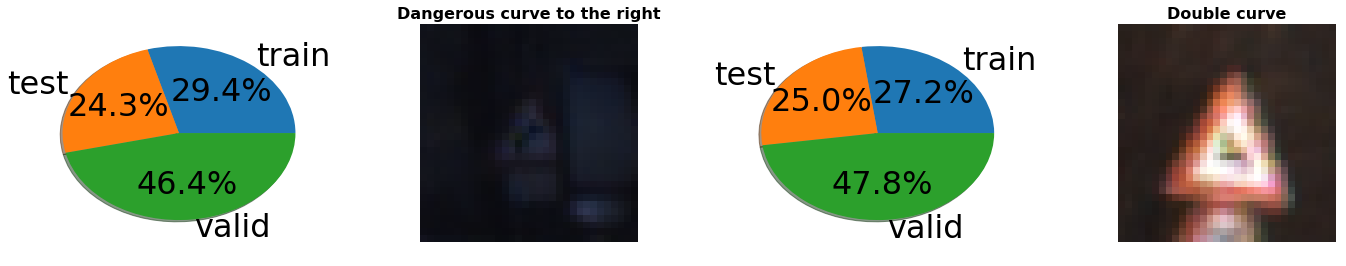

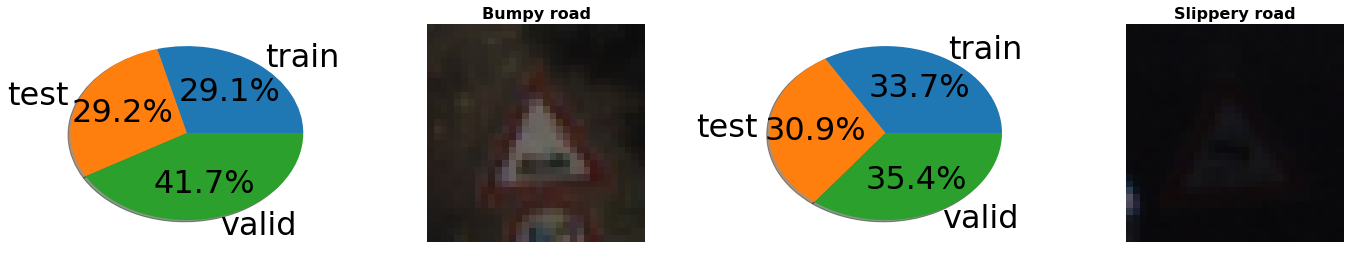

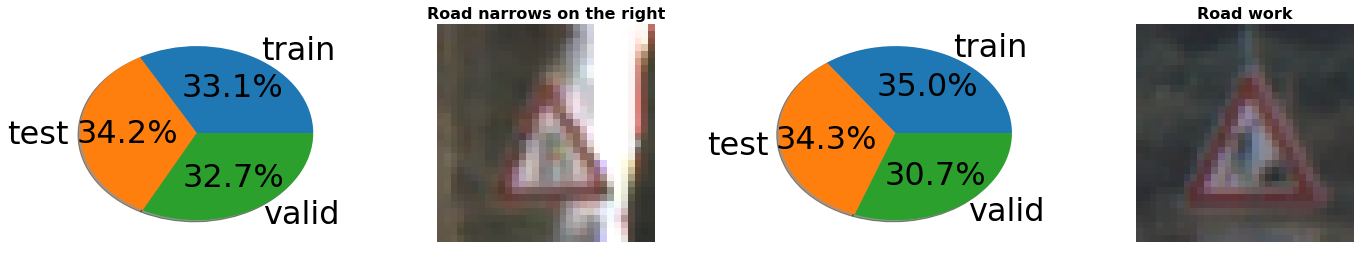

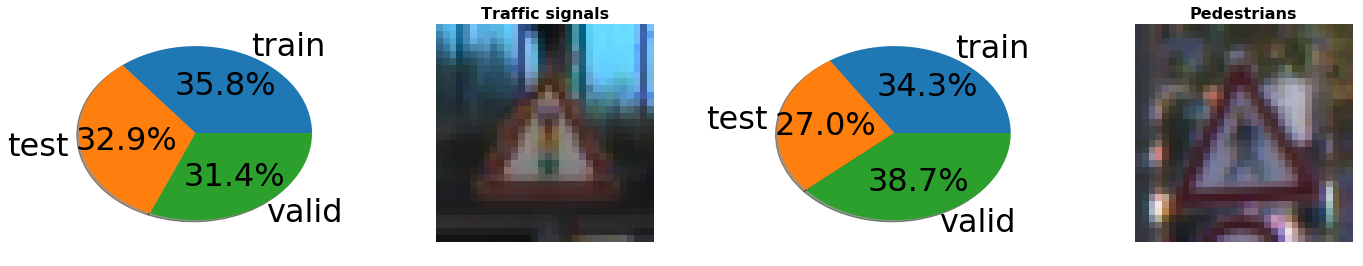

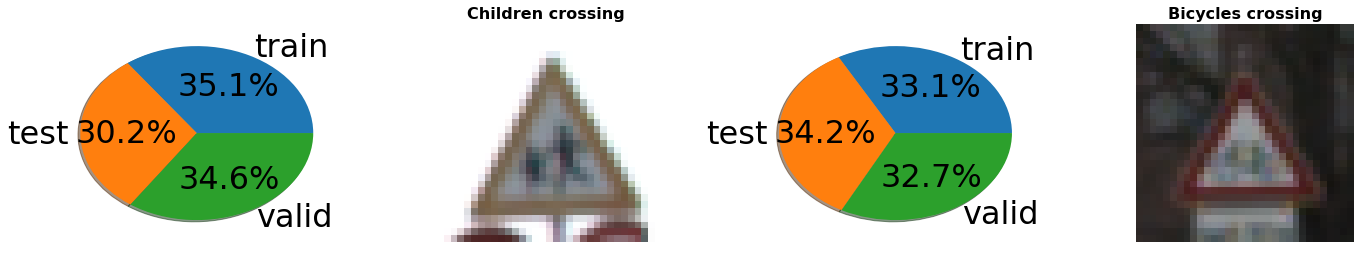

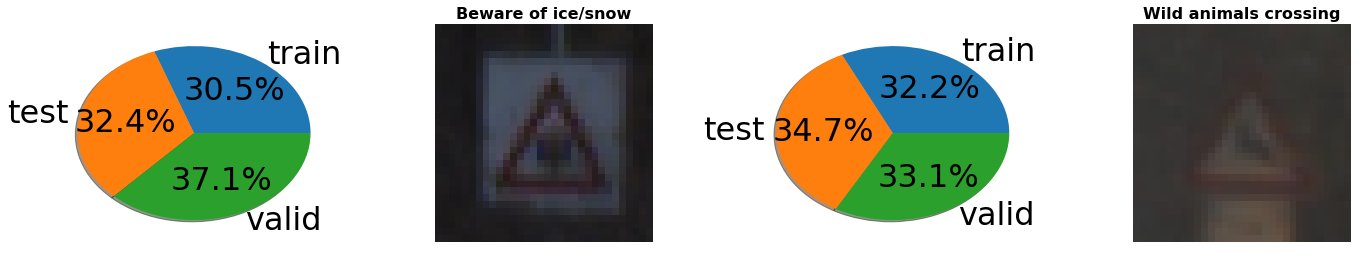

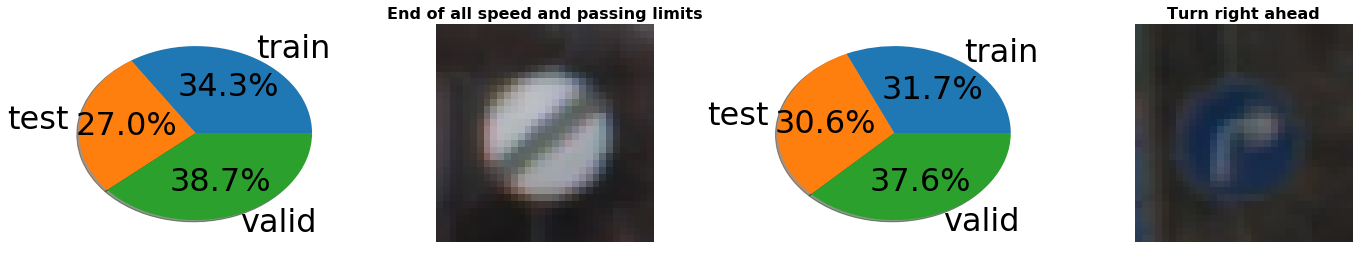

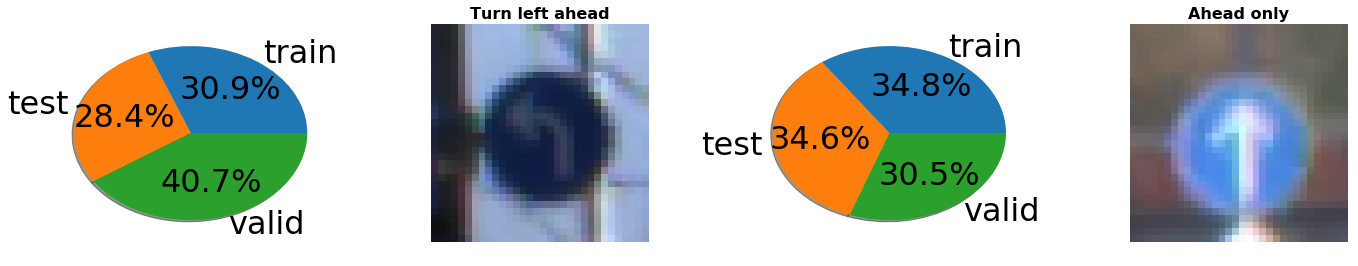

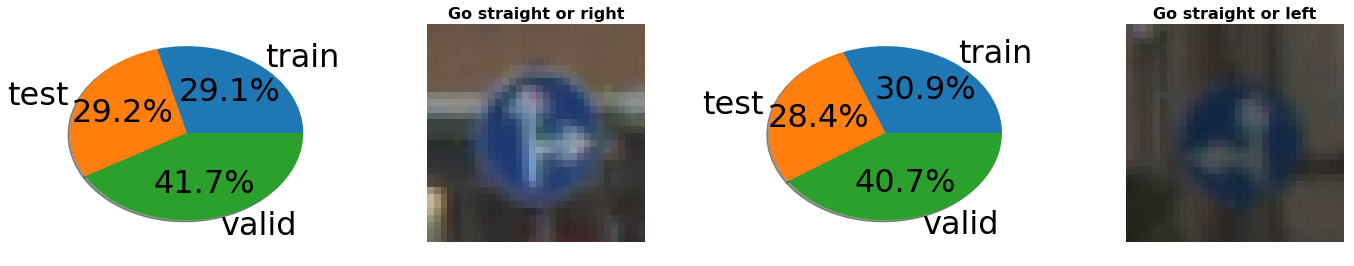

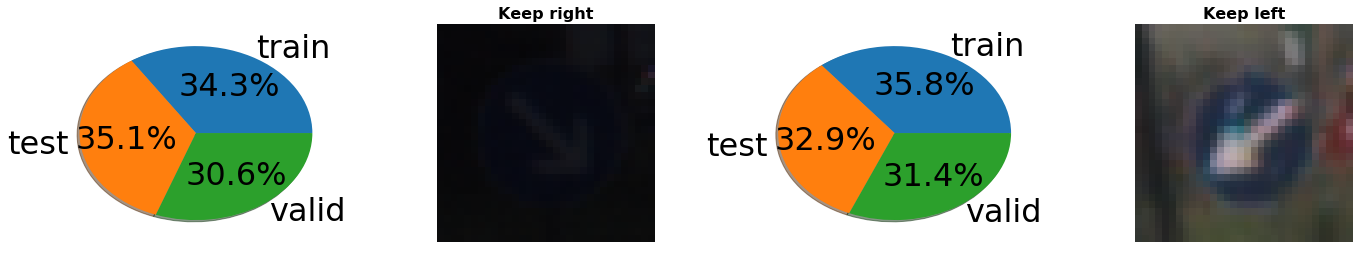

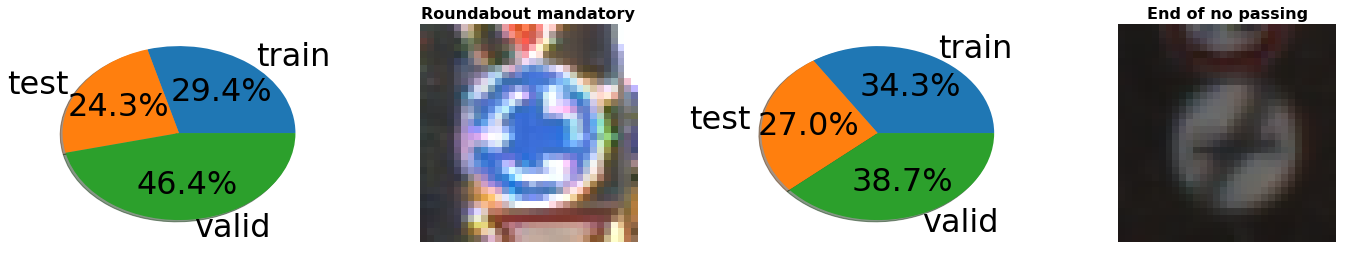

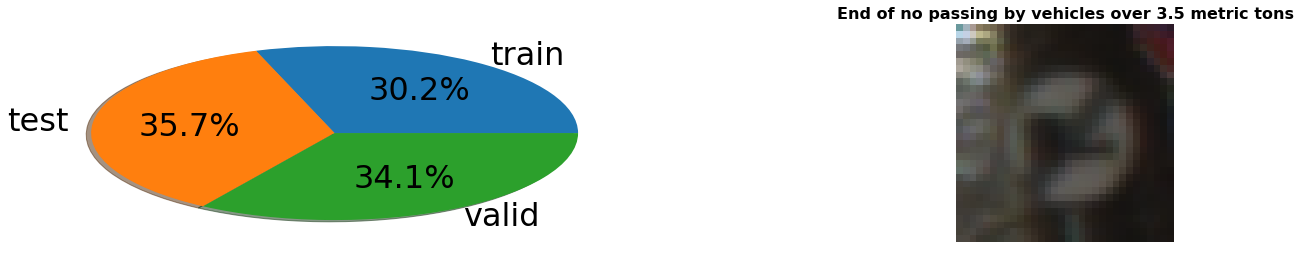

In [23]:
def plot_dataset(dataset):
    n_elements = len(dataset)
    COL_ELEMENTS = 2
    ROW_ELEMENTS = int(n_elements / COL_ELEMENTS) + (n_elements % COL_ELEMENTS > 0)
    curr_element_idx = 0
    for row_idx in range(ROW_ELEMENTS):
        col_range = COL_ELEMENTS if curr_element_idx + COL_ELEMENTS < n_elements else n_elements - curr_element_idx
        f, axes = plt.subplots(1, col_range*2, figsize=(24,4))
        for col_idx in range(col_range): 
            curr_element = dataset[curr_element_idx]
            # histogram
            dataset_label = ['train', 'test', 'valid']
            patches, texts, autotexts = axes[col_idx*2].pie(curr_element[2], autopct='%1.1f%%', 
                            shadow=True, labels=dataset_label, textprops={'fontsize': 32}, radius=1)
            
            # image
            axes[col_idx*2 + 1].imshow(curr_element[0])
            axes[col_idx*2 + 1].set_title(curr_element[1], {'fontsize': 16,'fontweight' : 'bold'})
            axes[col_idx*2 + 1].axis('off')
            curr_element_idx += 1

train_samples = list()
for name_idx, curr_ID in enumerate(labels_ID):
    image_idx = np.where(y_train == curr_ID)[0][0]
    train_idx = np.where(train_ID == curr_ID)[0]
    test_idx = np.where(test_ID == curr_ID)[0]
    valid_idx = np.where(valid_ID == curr_ID)[0]
    curr_count = [100*train_ID_count[train_idx][0]/n_train
                  , 100*test_ID_count[test_idx][0]/n_test
                  , 100*valid_ID_count[valid_idx][0]/n_validation]
    train_samples.append([X_train[image_idx], labels_name[name_idx], curr_count])
    
    
plot_dataset(train_samples)

## Pie of Samples Distribution Over Datasets

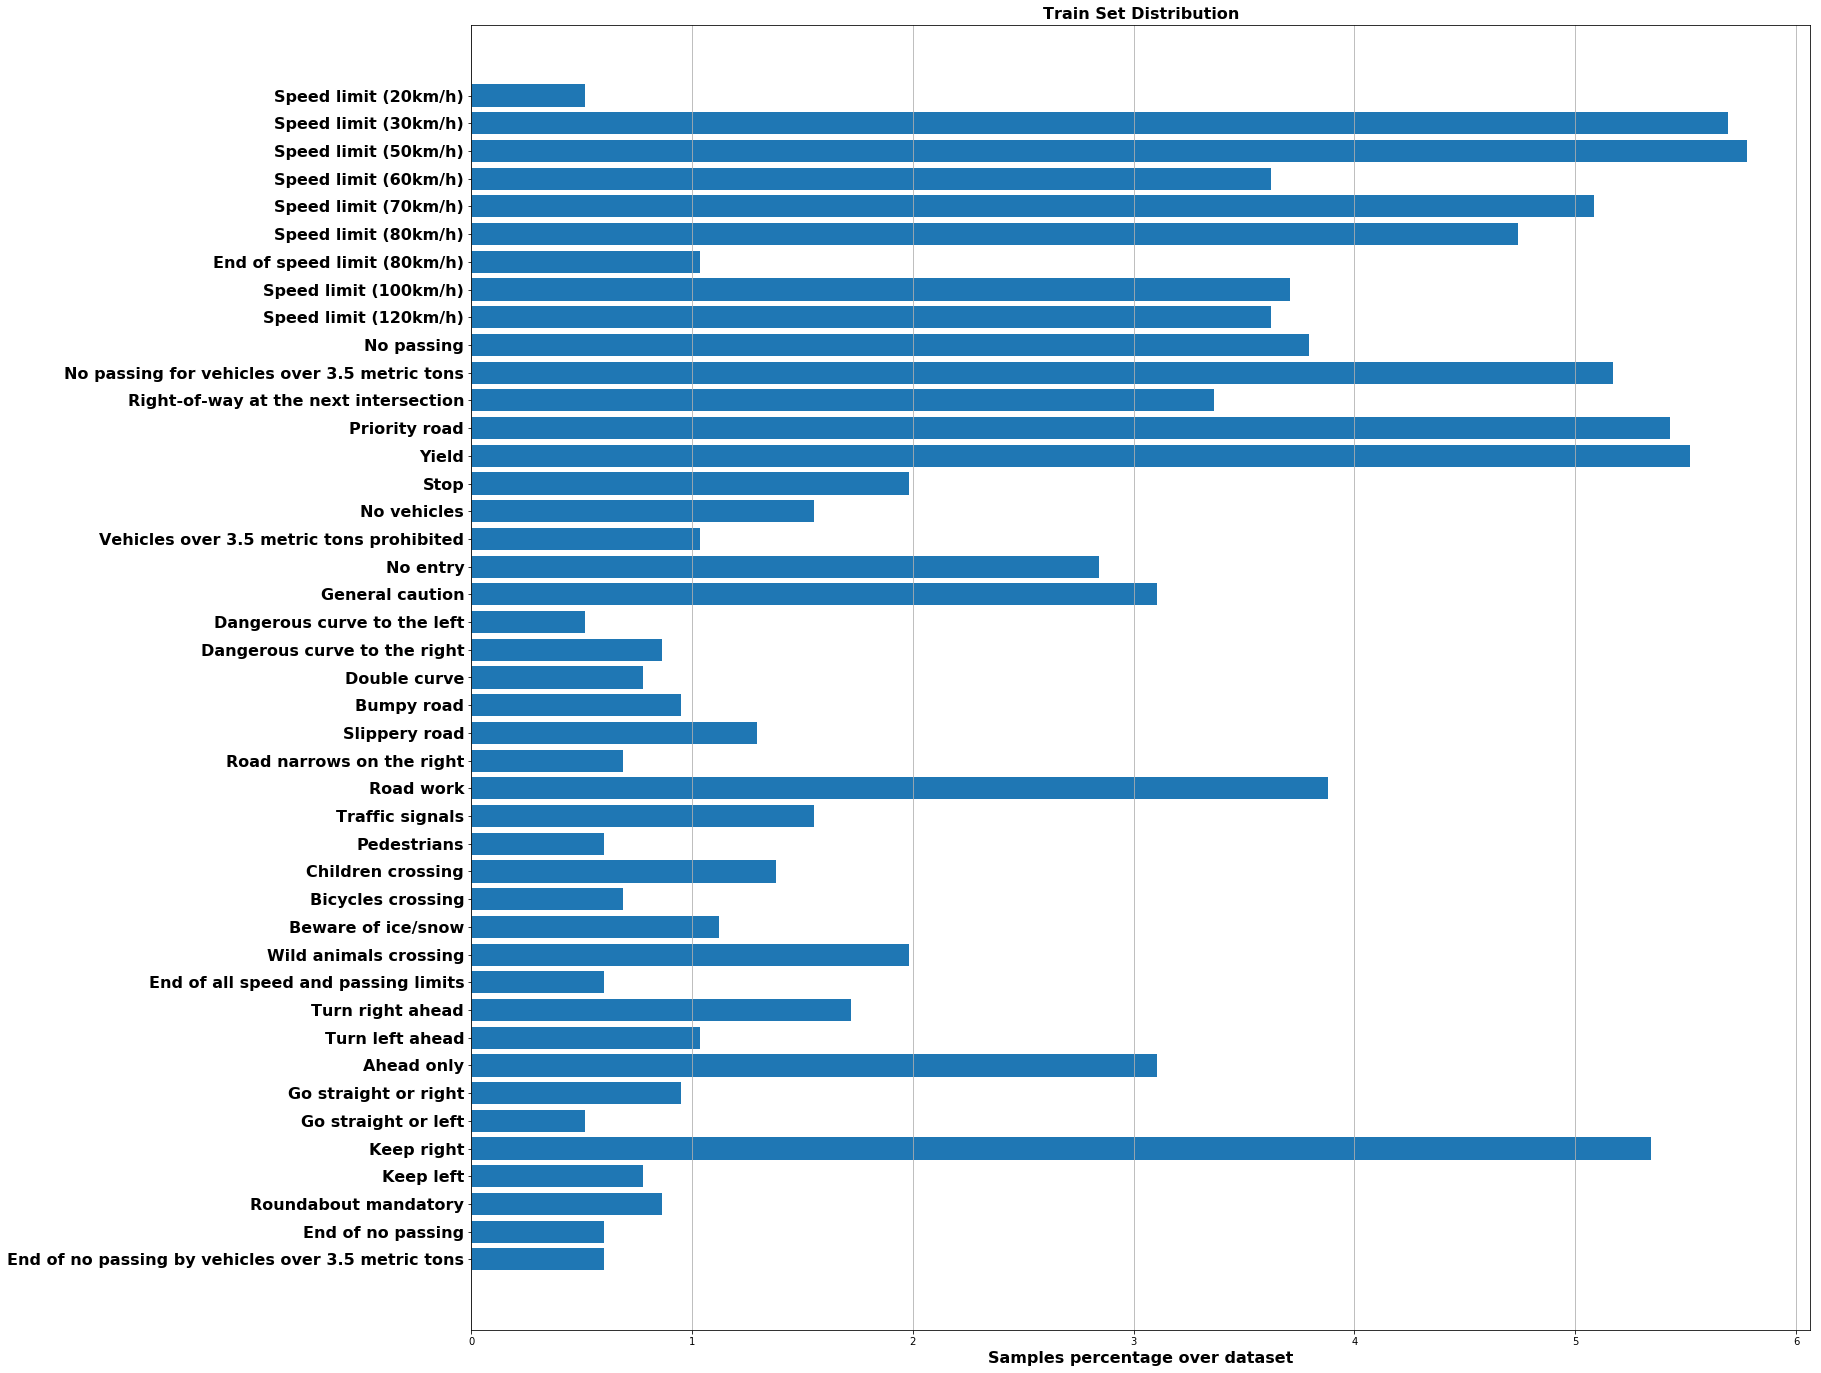

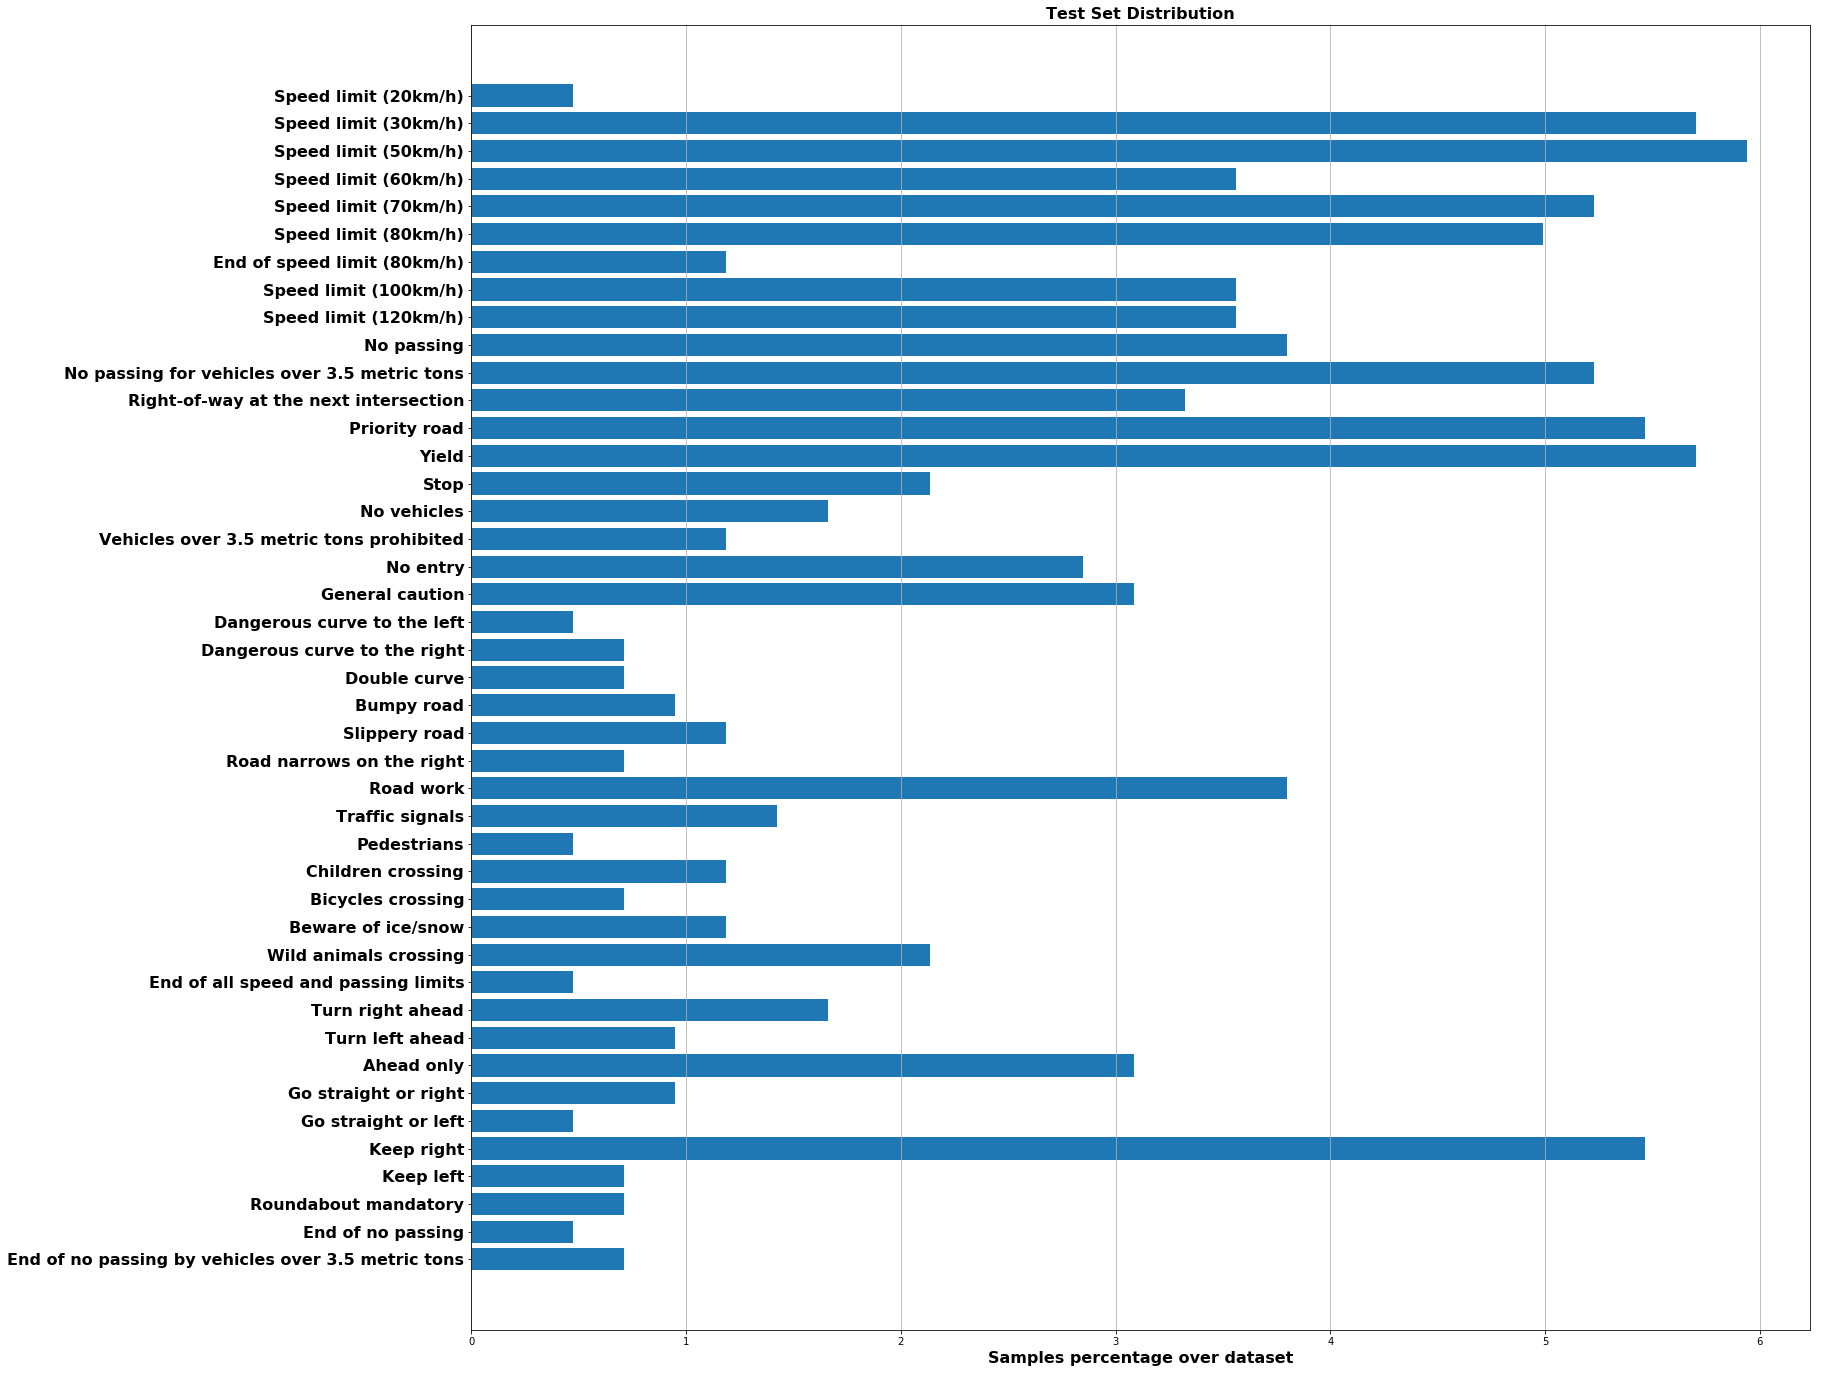

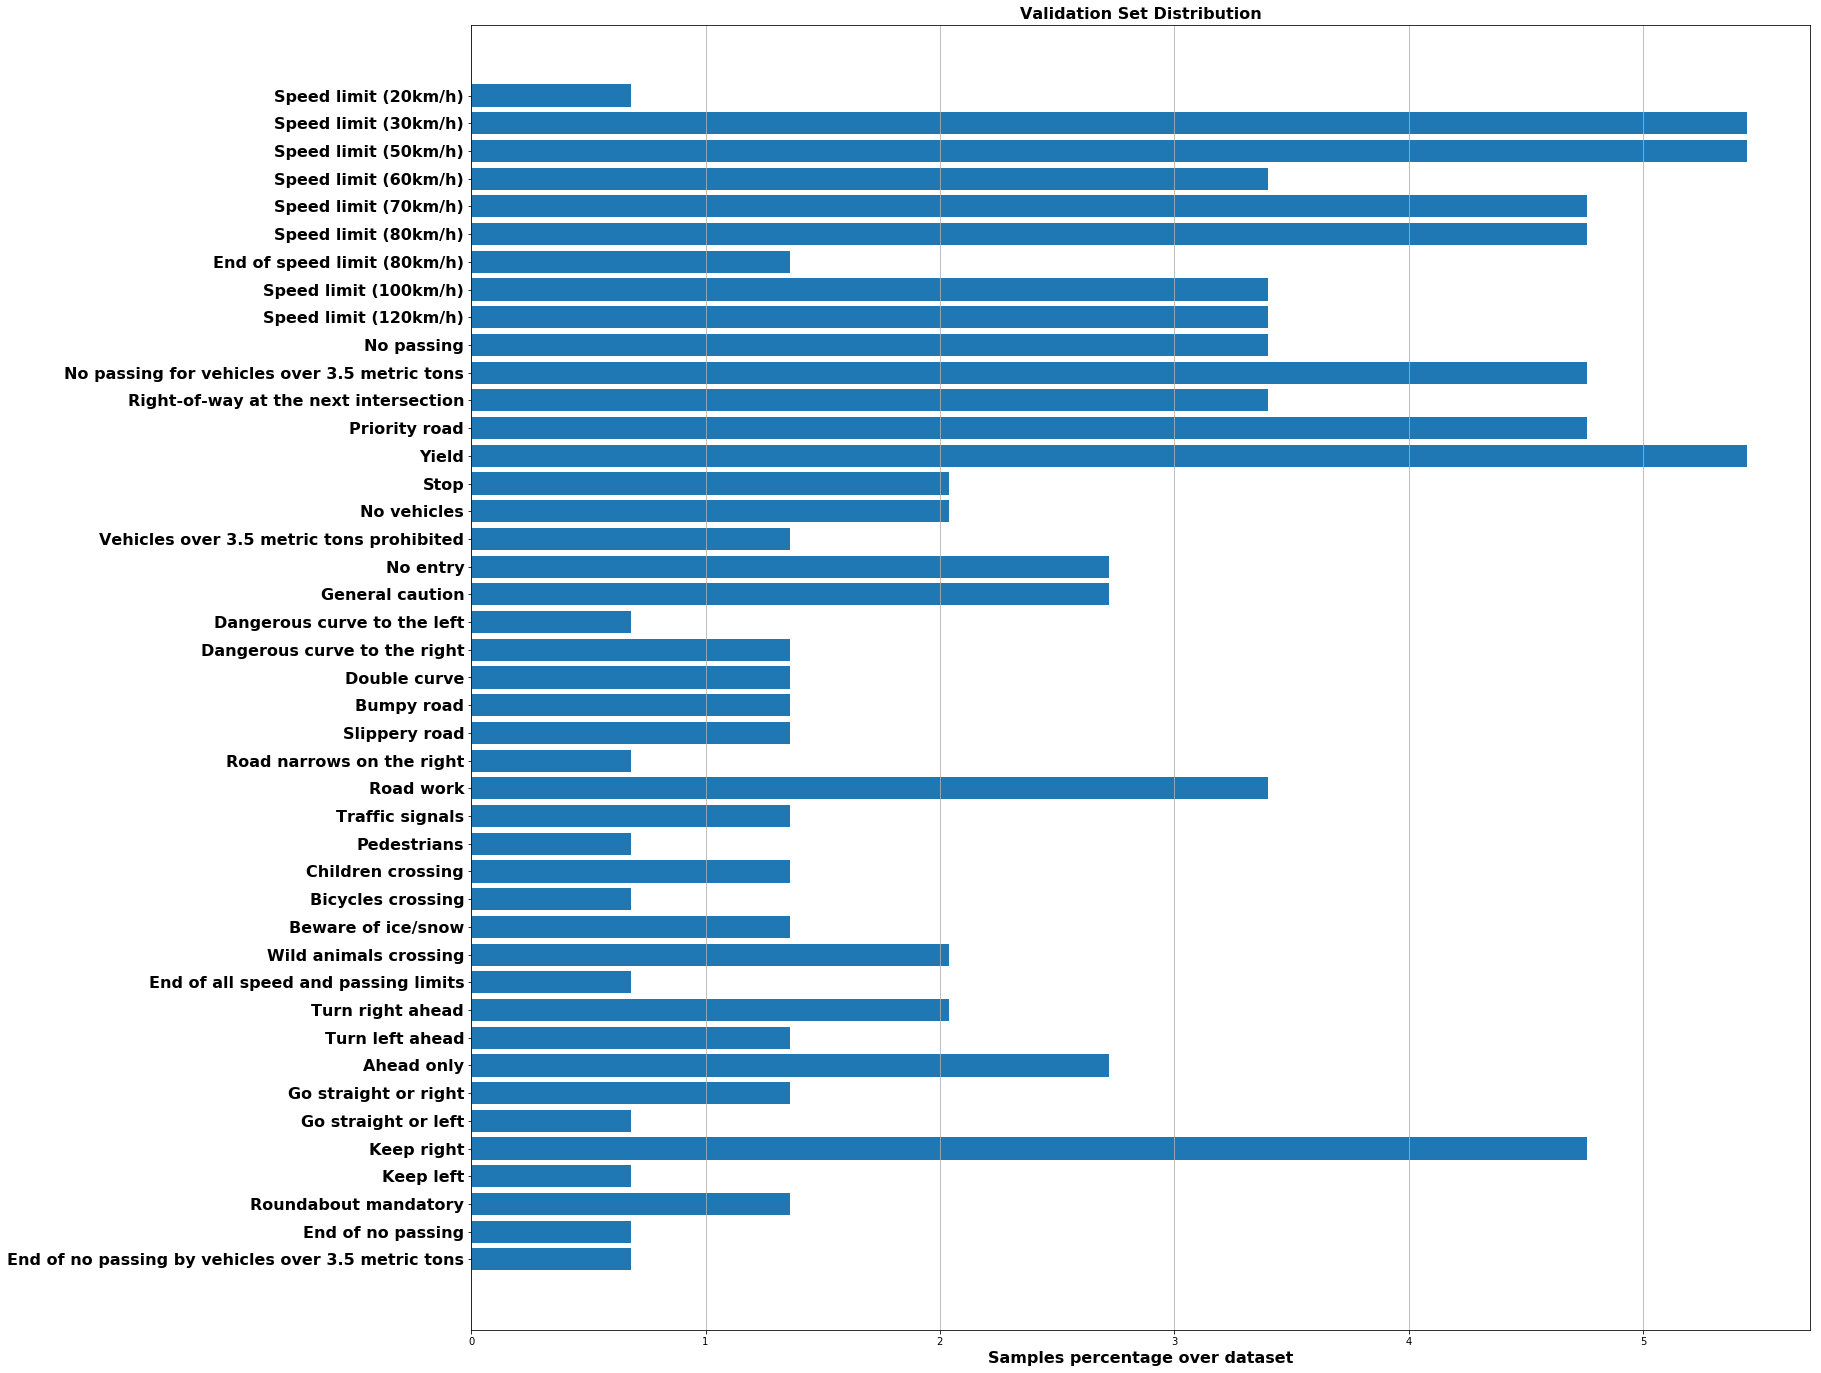

In [24]:
def plot_distribution(set_count, set_name='Standard Set'):
    f, ax = plt.subplots(figsize=(24,24))
    y_pos = np.arange(len(labels_name))
    ax.barh(y_pos, set_count, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels_name, {'fontsize': 16,'fontweight' : 'bold'})
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Samples percentage over dataset', {'fontsize': 16,'fontweight' : 'bold'})
    ax.set_title(set_name+' Distribution', {'fontsize': 16,'fontweight' : 'bold'})
    ax.grid(axis='x')

plot_distribution(100*train_ID_count/n_train, 'Train Set')
plot_distribution(100*test_ID_count/n_test, 'Test Set')
plot_distribution(100*valid_ID_count/n_validation, 'Validation Set')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### Pre-process the Data Set

In this section the datasets will be shuffeled and pre.processed.

The pre-processing iter provides for:
* conversion RGB to Gray scale
* Min-Max scaling with zero mean

In [25]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)

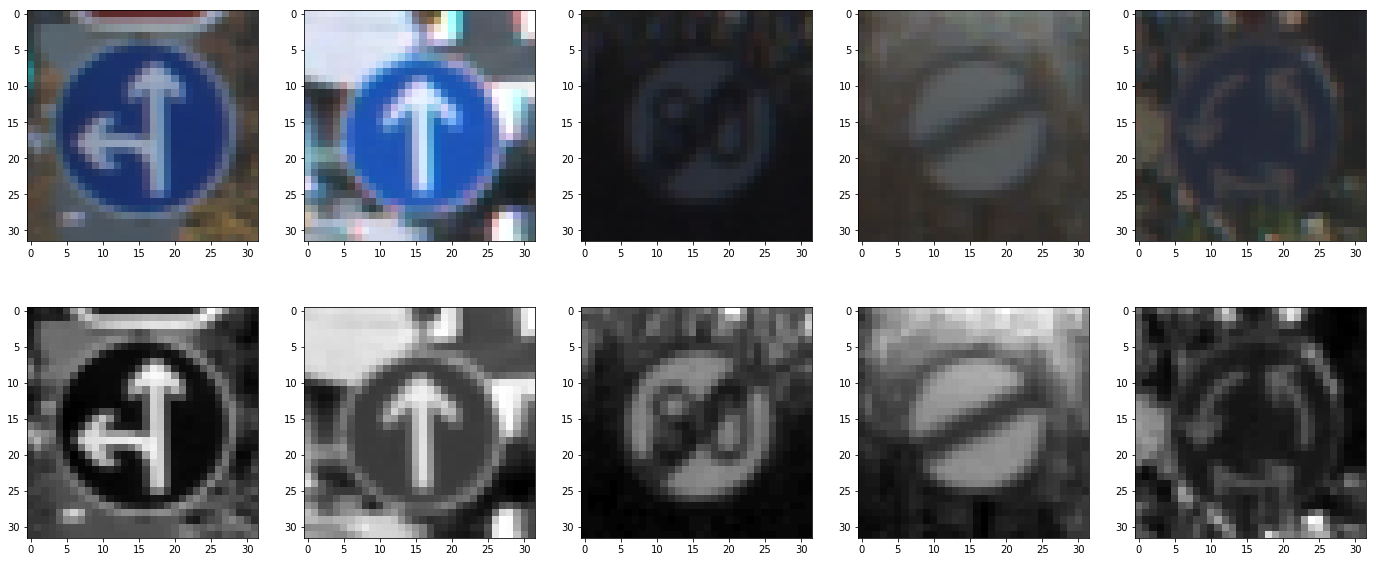

In [26]:
def preprocess_image(img):
    # RGB -> Gray scale conversion
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Min-Max scaling
    a = -0.9
    b = 0.9
    x_min = 0
    x_max = 255
    img_norm = (a + ( (gray - x_min) * (b - a) ) / (x_max - x_min))
    out = img_norm.astype('float32')
    return out.reshape(32,32,1)

indices = list()
indices = np.random.randint(0, n_train, size=5)
sample_images = X_train[indices]
preprocessed_sample_images = [preprocess_image(img) for img in sample_images]
f, axes = plt.subplots(2, 5, figsize=(24,10))
for idx, (org_img, norm_img) in enumerate(zip(sample_images, preprocessed_sample_images)):
    axes[0, idx].imshow(org_img)
    axes[1, idx].imshow(norm_img[:,:,0], cmap='gray')

### Datasets Preprocessing
In this section all the images of the three datasets will be preprocessed to weel condition them for the CNN.

In [27]:
# training dataset
X_train = [preprocess_image(img) for img in X_train]
# test dataset
X_test = [preprocess_image(img) for img in X_test]
# validation dataset
X_valid = [preprocess_image(img) for img in X_valid]

### Model Architecture
In this section there is the implementation of the neural network architecture.
The choosen one is the [LeNet-5](http://yann.lecun.com/exdb/lenet/)

#### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.
Since the current dataset has been preprocessed in grayscale, C is 1.

#### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Relu policy will be used.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Relu policy will be used.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 2D.

**Dropout.** Dropout the output of the flatten layer to introduce redundant representation 

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Relu policy will be used..

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Relu policy will be used..

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

#### Output
Return the result of the 2nd fully connected layer.

In [28]:
def LeNet5(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W_l1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    b_l1 = tf.Variable(tf.zeros(6))
    conv_l1   = tf.nn.conv2d(x, W_l1, strides=[1, 1, 1, 1], padding='VALID') + b_l1
    
    # Activation.
    conv_l1 = tf.nn.relu(conv_l1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_l1 = tf.nn.max_pool(conv_l1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    W_l2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    b_l2 = tf.Variable(tf.zeros(16))
    conv_l2   = tf.nn.conv2d(pool_l1, W_l2, strides=[1, 1, 1, 1], padding='VALID') + b_l2
    
    # Activation.
    conv_l2 = tf.nn.relu(conv_l2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_l2 = tf.nn.max_pool(conv_l2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    flat0   = flatten(pool_l2)
    
    # Dropout
    drop0 = tf.nn.dropout(flat0, keep_prob)
    
    # Layer 3: Convolutional. Input = 400. Output = 120.
    W_l3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b_l3 = tf.Variable(tf.zeros(120))
    fc_l3   = tf.add(tf.matmul(drop0, W_l3), b_l3)
    
    # Activation.
    fc_l3 = tf.nn.relu(fc_l3)
    
    # Layer 4: Convolutional. Input = 120. Output = 84.
    W_l4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b_l4 = tf.Variable(tf.zeros(84))
    fc_l4  = tf.add(tf.matmul(fc_l3, W_l4), b_l4)
    
    # Activation.
    fc_l4 = tf.nn.relu(fc_l4)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    W_l5 = tf.Variable(tf.random_normal([84, 43]))
    b_l5 = tf.Variable(tf.zeros([43]))
    logits = tf.add(tf.matmul(fc_l4, W_l5), b_l5)
    
    return logits, conv_l1

## Features, Labels and Setup TensorFlw
Train LeNet to classify [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [29]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

In [30]:
EPOCHS = 55
BATCH_SIZE = 1024

## Training Pipeline
Create a training pipeline that uses the model to classify German Traffic Sign data.

In [31]:
rate = 0.001

logits, CNN_l1 = LeNet5(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [32]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    accuracy_hist = list()
    loss_hist = list()
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, curr_loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        curr_accuracy = evaluate(X_valid, y_valid)
        
        accuracy_hist.append(curr_accuracy)
        loss_hist.append(curr_loss)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(curr_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.082

EPOCH 2 ...
Validation Accuracy = 0.278

EPOCH 3 ...
Validation Accuracy = 0.450

EPOCH 4 ...
Validation Accuracy = 0.629

EPOCH 5 ...
Validation Accuracy = 0.737

EPOCH 6 ...
Validation Accuracy = 0.790

EPOCH 7 ...
Validation Accuracy = 0.817

EPOCH 8 ...
Validation Accuracy = 0.835

EPOCH 9 ...
Validation Accuracy = 0.855

EPOCH 10 ...
Validation Accuracy = 0.857

EPOCH 11 ...
Validation Accuracy = 0.880

EPOCH 12 ...
Validation Accuracy = 0.878

EPOCH 13 ...
Validation Accuracy = 0.890

EPOCH 14 ...
Validation Accuracy = 0.894

EPOCH 15 ...
Validation Accuracy = 0.893

EPOCH 16 ...
Validation Accuracy = 0.892

EPOCH 17 ...
Validation Accuracy = 0.901

EPOCH 18 ...
Validation Accuracy = 0.903

EPOCH 19 ...
Validation Accuracy = 0.907

EPOCH 20 ...
Validation Accuracy = 0.903

EPOCH 21 ...
Validation Accuracy = 0.913

EPOCH 22 ...
Validation Accuracy = 0.915

EPOCH 23 ...
Validation Accuracy = 0.921

EPOCH 24 ...
Validation Accura

## Model Evaluation

In [34]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    train_set_accuracy = evaluate(X_train, y_train)
    
    validation_set_accuracy = evaluate(X_valid, y_valid)
    
    test_accuracy = evaluate(X_test, y_test)

INFO:tensorflow:Restoring parameters from ./lenet


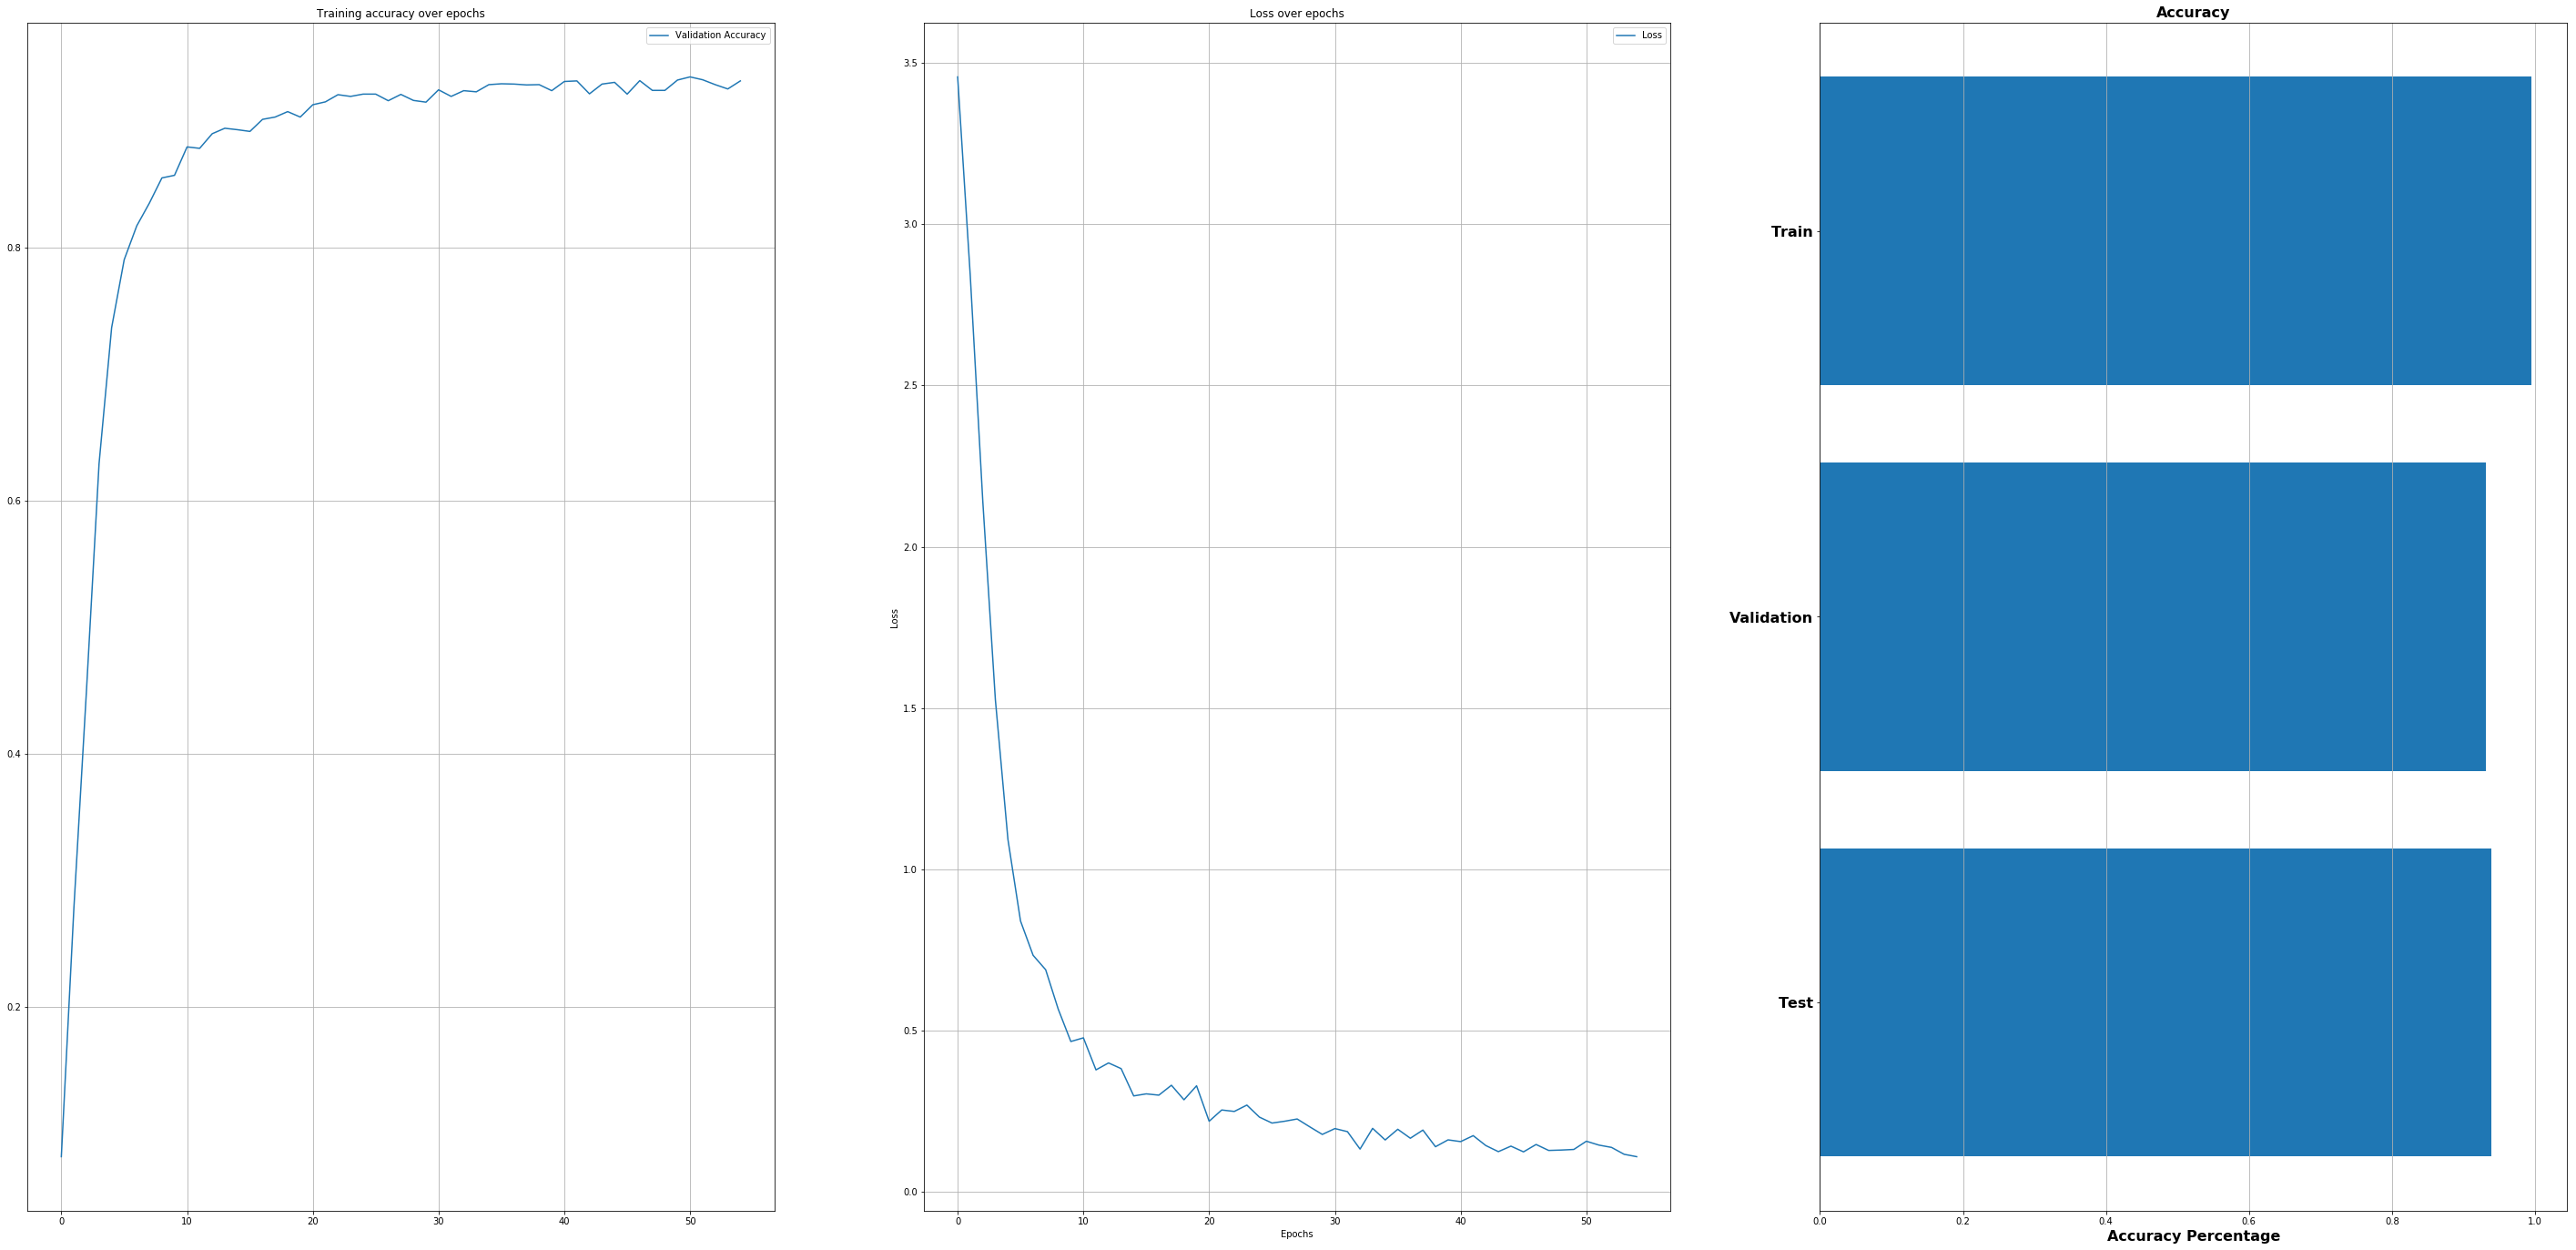

In [35]:
f,axes = plt.subplots(1, 3, figsize=(50,24))
axes[0].plot(range(EPOCHS), accuracy_hist, label='Validation Accuracy')
axes[0].grid()
axes[0].set_title('Training accuracy over epochs')
axes[0].legend()

axes[1].plot(range(EPOCHS), loss_hist, label='Loss')
axes[1].grid()
axes[1].legend()
axes[1].set_title('Loss over epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')

Dataset_name = ['Train', 'Validation', 'Test']
Dataset_accuracy = [train_set_accuracy, validation_set_accuracy, test_accuracy]
y_pos = np.arange(len(Dataset_name))
axes[2].barh(y_pos, Dataset_accuracy, align='center')
axes[2].set_yticks(y_pos)
axes[2].set_yticklabels(Dataset_name, {'fontsize': 16,'fontweight' : 'bold'})
axes[2].invert_yaxis()  # labels read top-to-bottom
axes[2].set_xlabel('Accuracy', {'fontsize': 16,'fontweight' : 'bold'})
axes[2].set_title('Accuracy', {'fontsize': 16,'fontweight' : 'bold'})
axes[2].grid(axis='x')

plt.text(0.1, y_pos[0], ''.format(train_set_accuracy), dict(size=30))
plt.text(0.1, y_pos[1], ''.format(validation_set_accuracy), dict(size=30))
plt.text(0.1, y_pos[2], ''.format(test_accuracy), dict(size=30))

---

## Step 3: Test a Model on New Images

To test how your model is working, I tested it using ten new pictures of German traffic signs from the web and I used the model to predict the traffic sign type.

### Load and Output the Images

./new_sign_img/3.png
./new_sign_img/1.png
./new_sign_img/10.png
./new_sign_img/4.png
./new_sign_img/6.png
./new_sign_img/5.png
./new_sign_img/7.png
./new_sign_img/9.png
./new_sign_img/8.png
./new_sign_img/2.png
New picture labels:
 ['Roundabout mandatory' 'Priority road' 'Bumpy road' 'Keep right'
 'Right-of-way at the next intersection' 'Yield' 'Speed limit (60km/h)'
 'Stop' 'Pedestrians' 'Go straight or right']


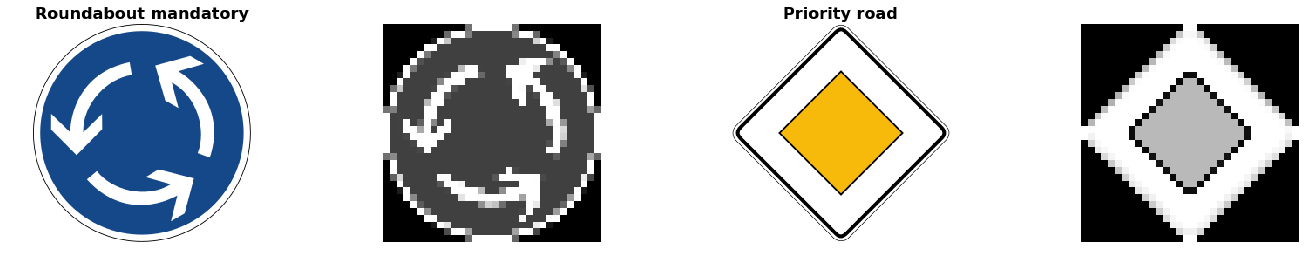

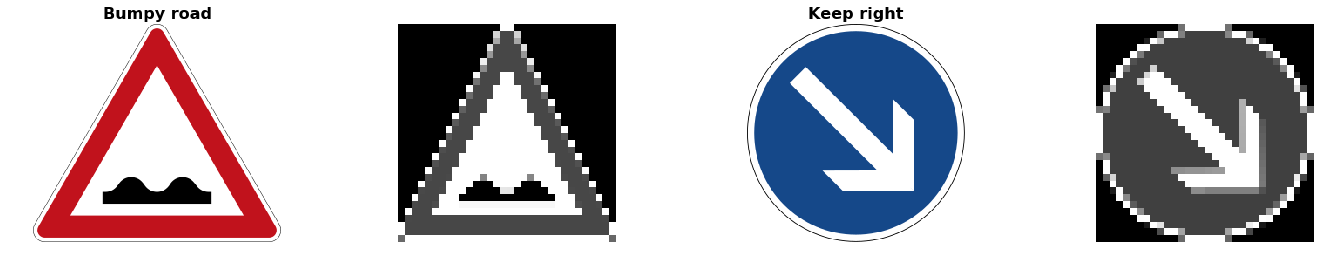

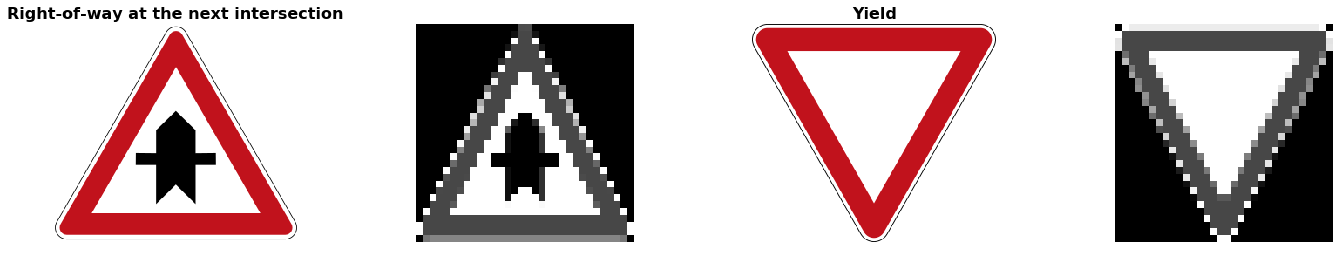

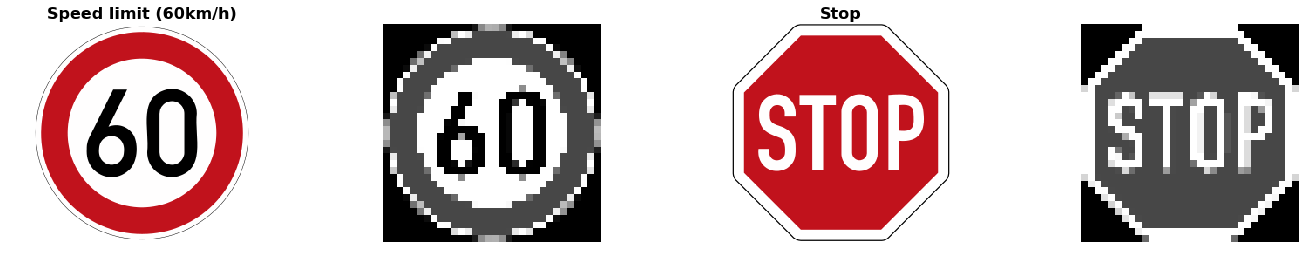

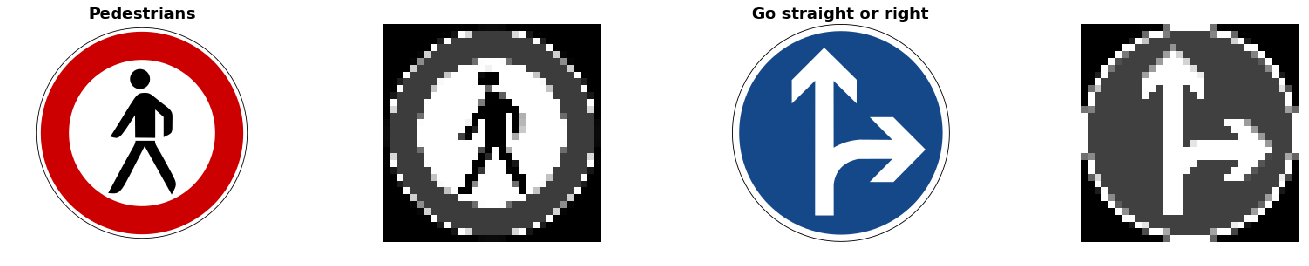

In [48]:
### Load the images and plot them here.
import glob
import matplotlib.image as mpimg
new_imgs_path = glob.glob('./new_sign_img/*.png')
new_imgs = list()

for img_path in new_imgs_path:
    print(img_path)
    img = mpimg.imread(img_path)
    new_imgs.append(img)
    
new_labels_idx = list()
new_labels_idx.append(labels.loc[labels['SignName']=='Roundabout mandatory'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Priority road'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Bumpy road'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Keep right'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Right-of-way at the next intersection'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Yield'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Speed limit (60km/h)'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Stop'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Pedestrians'].iloc[0][0])
new_labels_idx.append(labels.loc[labels['SignName']=='Go straight or right'].iloc[0][0])

new_test_set_labels = labels_name[new_labels_idx]
print('New picture labels:\n', new_test_set_labels)

norm_new_imgs = [preprocess_image(cv2.resize(img,(32, 32))) for img in new_imgs]

n_elements = len(new_imgs)
COL_ELEMENTS = 2
ROW_ELEMENTS = int(n_elements / COL_ELEMENTS) + (n_elements % COL_ELEMENTS > 0)
curr_img_idx = 0
for row_idx in range(ROW_ELEMENTS):
    col_range = COL_ELEMENTS if curr_img_idx + COL_ELEMENTS < n_elements else n_elements - curr_img_idx
    f, axes = plt.subplots(1, col_range*2, figsize=(24,4))
    for col_idx in range(col_range):
        org_img = new_imgs[curr_img_idx]
        norm_img = norm_new_imgs[curr_img_idx]
        axes[col_idx*2].imshow(org_img)
        axes[col_idx*2].set_title(new_test_set_labels[curr_img_idx], {'fontsize': 16,'fontweight' : 'bold'})
        axes[col_idx*2].axis('off')
        axes[col_idx*2 + 1].imshow(norm_img[:,:,0], cmap='gray')
        axes[col_idx*2 + 1].axis('off')
        curr_img_idx += 1

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [51]:
# Run the model on
k_num = 5
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=k_num)

top_k_predictions = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_result = sess.run(top_k, feed_dict={x:norm_new_imgs, y:new_labels_idx, keep_prob:1.0})
    top_k_predictions.append((top_k_result))

    new_test_accuracy = evaluate(norm_new_imgs, new_labels_idx)
    print("New Test Set Accuracy = {:.3f}".format(new_test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
New Test Set Accuracy = 0.091


## Performance Analysis

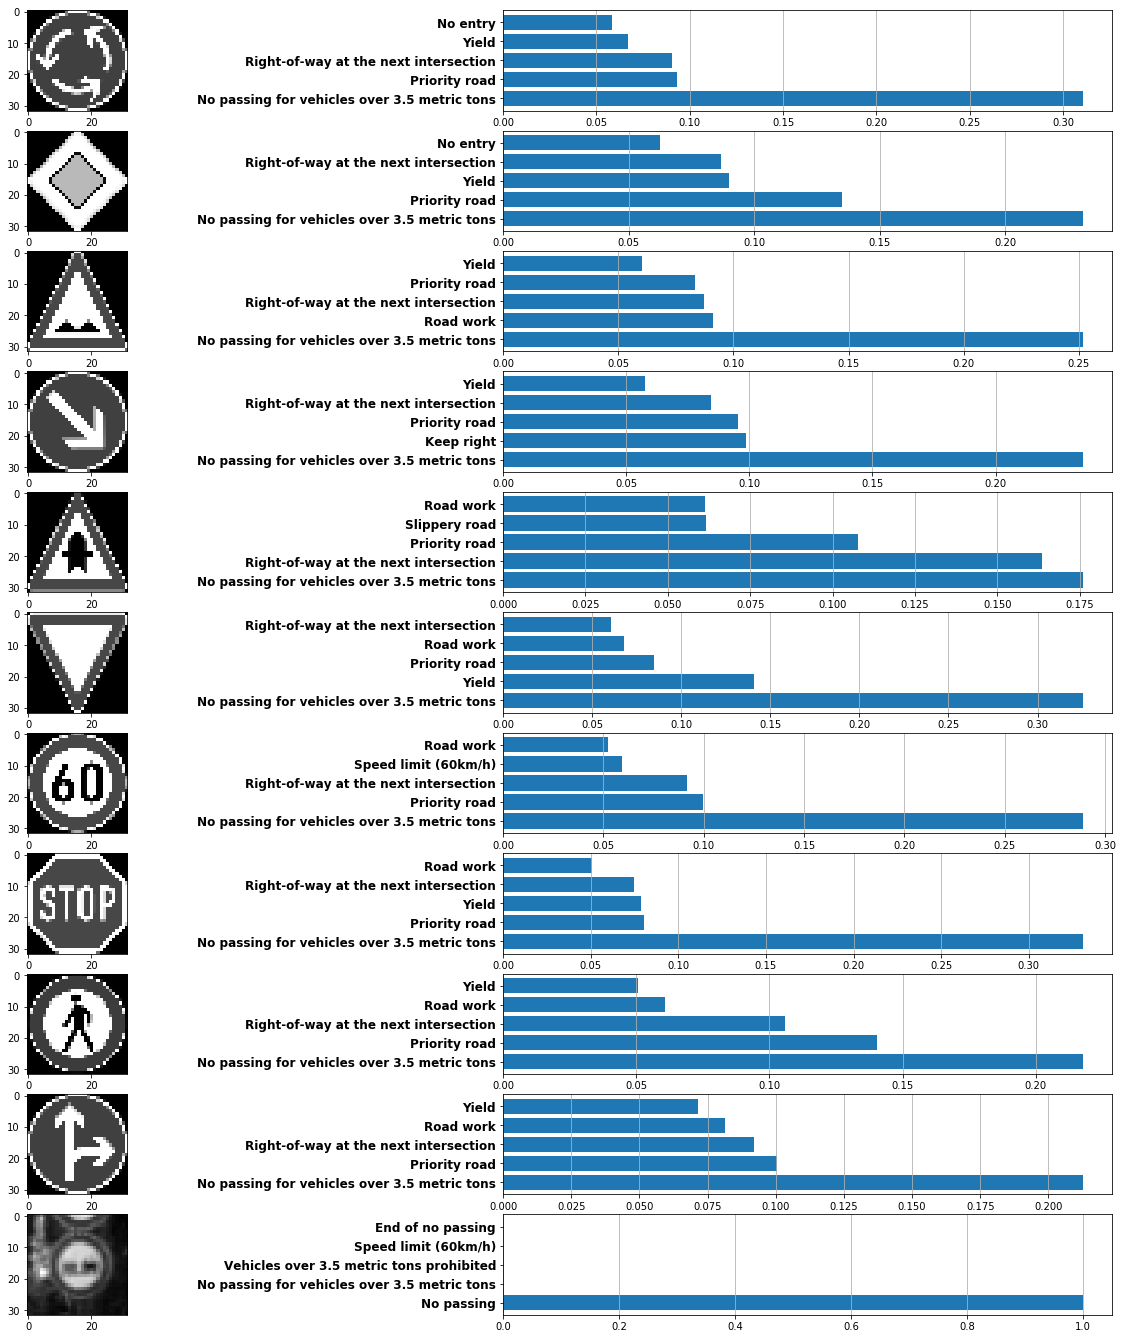

In [52]:
f,axes = plt.subplots(len(norm_new_imgs), 2, figsize=(24, 24))

for idx, img in enumerate(norm_new_imgs):
    axes[idx][0].imshow(img[:,:,0], cmap='gray')
    axes[idx][0].axis('off')
    
    top_k_lab_num = top_k_predictions[0].indices[idx]
    top_k_labels = labels_name[top_k_predictions[0].indices[idx]]
    axes[idx][1].barh(np.arange(0, 5, 1), top_k_predictions[0].values[idx])
    axes[idx][1].grid(axis='x')
    axes[idx][1].set_yticks(np.arange(0, 5, 1))
    axes[idx][1].set_yticklabels(top_k_labels, {'fontweight':'bold', 'fontsize':12})

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

INFO:tensorflow:Restoring parameters from ./lenet
Test Image :  Stop


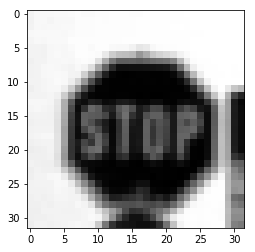

INFO:tensorflow:Restoring parameters from ./lenet
Test Image :  Speed limit (100km/h)


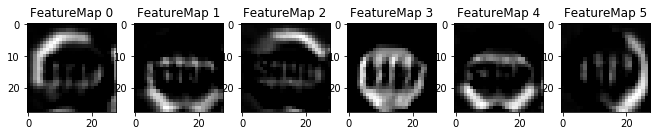

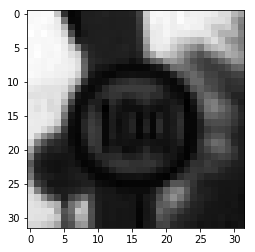

INFO:tensorflow:Restoring parameters from ./lenet
Test Image :  Speed limit (60km/h)


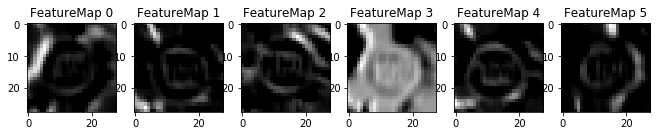

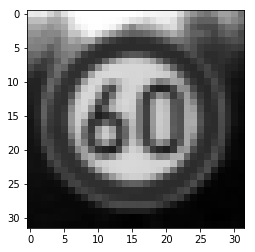

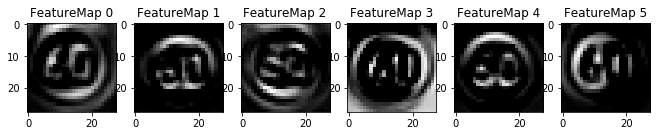

In [39]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    image_input = np.expand_dims(image_input, axis=0)
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
indices = list()
indices = np.random.randint(0, n_train, size=3)
sample_imgs = [X_train[idx] for idx in indices]
sample_labels = labels_name[y_train[indices]]

for idx, test_img in enumerate(sample_imgs):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        # Test image visualization
        print('Test Image : ', sample_labels[idx])
        f, a = plt.subplots()
        a.imshow(test_img[:,:,0], cmap='gray')
        plt.show()
        # First convolutional layer feature map
        outputFeatureMap(test_img, CNN_l1, plt_num=1)

In [40]:
print(sample_imgs[0].shape)

(32, 32, 1)
